# Class 9 Content

During the class the following was covered:

- Data joins: <code>inner()</code>, <code>outer()</code>,<code>left()</code>, <code>right()</code>
- <code>.loc[]</code>, <code>.iloc[]</code>, 
- <code>np.where()</code>, 
- Checking null values (missings) and handlining them
- Data visualization 
   - bar charts
   - histograms
   - box plot
   - pair plots

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_ind #Independent Sample T-test

In [17]:
data_one=pd.read_excel('salary.xlsx', sheet_name='salary')

In [18]:
data_two=pd.read_excel('salary.xlsx',sheet_name='s2')

In [19]:
data_one.head(3)

,ID,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,hours.per.week,native.country,income
0,1,90,?,77053,HS-grad,Widowed,NaN,Not-in-family,White,40.0,United-States,<=50K
1,2,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,18.0,United-States,<=50K
2,3,66,?,186061,Some-college,Widowed,NaN,Unmarried,Black,40.0,United-States,<=50K


In [20]:
data_two.head(3)

,EmployeeID,education.num,Geder
0,1,NaN,Female
1,6,NaN,Female
2,7,NaN,Male


**Below the main types of joins are presented that can be implemented using the pandas module:**

<img src="https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png?ezimgfmt=ng:webp/ngcb1" />

In [21]:
#inner join 
data_inner= pd.merge(data_one,data_two, how='inner',
         right_on='EmployeeID',
         left_on='ID')

In [22]:
data_inner.head(10)

,ID,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,hours.per.week,native.country,income,EmployeeID,education.num,Geder
0,1,90,?,77053,HS-grad,Widowed,NaN,Not-in-family,White,40.0,United-States,<=50K,1,NaN,Female
1,6,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,45.0,United-States,<=50K,6,NaN,Female
2,7,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,40.0,United-States,<=50K,7,NaN,Male
3,8,74,State-gov,88638,Doctorate,Never-married,Prof-specialty,Other-relative,White,20.0,United-States,>50K,8,16.0,Female
4,9,68,Federal-gov,422013,HS-grad,Divorced,Prof-specialty,Not-in-family,White,40.0,United-States,<=50K,9,NaN,Female
5,10,41,Private,70037,Some-college,Never-married,Craft-repair,Unmarried,White,60.0,NaN,>50K,10,10.0,Male
6,11,45,Private,172274,Doctorate,Divorced,Prof-specialty,Unmarried,Black,35.0,United-States,>50K,11,16.0,Female
7,12,38,Self-emp-not-inc,164526,Prof-school,Never-married,Prof-specialty,Not-in-family,White,45.0,United-States,>50K,12,15.0,Male
8,13,52,Private,129177,Bachelors,Widowed,Other-service,Not-in-family,White,20.0,United-States,>50K,13,13.0,Female
9,14,32,Private,136204,Masters,Separated,Exec-managerial,Not-in-family,White,55.0,United-States,>50K,14,14.0,Male


In [23]:
#left join
data_left=pd.merge(data_one,data_two, how='left',
         right_on='EmployeeID',
         left_on='ID'
        
        )
data_left.head(10)

,ID,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,hours.per.week,native.country,income,EmployeeID,education.num,Geder
0,1,90,?,77053,HS-grad,Widowed,NaN,Not-in-family,White,40.0,United-States,<=50K,1.0,NaN,Female
1,2,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,18.0,United-States,<=50K,NaN,NaN,NaN
2,3,66,?,186061,Some-college,Widowed,NaN,Unmarried,Black,40.0,United-States,<=50K,NaN,NaN,NaN
3,4,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,40.0,United-States,<=50K,NaN,NaN,NaN
4,5,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,40.0,United-States,<=50K,NaN,NaN,NaN
5,6,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,45.0,United-States,<=50K,6.0,NaN,Female
6,7,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,40.0,United-States,<=50K,7.0,NaN,Male
7,8,74,State-gov,88638,Doctorate,Never-married,Prof-specialty,Other-relative,White,20.0,United-States,>50K,8.0,16.0,Female
8,9,68,Federal-gov,422013,HS-grad,Divorced,Prof-specialty,Not-in-family,White,40.0,United-States,<=50K,9.0,NaN,Female
9,10,41,Private,70037,Some-college,Never-married,Craft-repair,Unmarried,White,60.0,NaN,>50K,10.0,10.0,Male


In [24]:
#right join
data_right=pd.merge(data_one,data_two, how='right',
         right_on='EmployeeID',
         left_on='ID'
        
        )

data_right.head(10)

,ID,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,hours.per.week,native.country,income,EmployeeID,education.num,Geder
0,1,90,?,77053,HS-grad,Widowed,NaN,Not-in-family,White,40.0,United-States,<=50K,1,NaN,Female
1,6,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,45.0,United-States,<=50K,6,NaN,Female
2,7,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,40.0,United-States,<=50K,7,NaN,Male
3,8,74,State-gov,88638,Doctorate,Never-married,Prof-specialty,Other-relative,White,20.0,United-States,>50K,8,16.0,Female
4,9,68,Federal-gov,422013,HS-grad,Divorced,Prof-specialty,Not-in-family,White,40.0,United-States,<=50K,9,NaN,Female
5,10,41,Private,70037,Some-college,Never-married,Craft-repair,Unmarried,White,60.0,NaN,>50K,10,10.0,Male
6,11,45,Private,172274,Doctorate,Divorced,Prof-specialty,Unmarried,Black,35.0,United-States,>50K,11,16.0,Female
7,12,38,Self-emp-not-inc,164526,Prof-school,Never-married,Prof-specialty,Not-in-family,White,45.0,United-States,>50K,12,15.0,Male
8,13,52,Private,129177,Bachelors,Widowed,Other-service,Not-in-family,White,20.0,United-States,>50K,13,13.0,Female
9,14,32,Private,136204,Masters,Separated,Exec-managerial,Not-in-family,White,55.0,United-States,>50K,14,14.0,Male


> **The further calculations are done on <code>data_inner</code>**

In [25]:
data_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32557 entries, 0 to 32556
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              32557 non-null  int64  
 1   age             32557 non-null  int64  
 2   workclass       32557 non-null  object 
 3   fnlwgt          32557 non-null  int64  
 4   education       32557 non-null  object 
 5   marital.status  32557 non-null  object 
 6   occupation      30715 non-null  object 
 7   relationship    32557 non-null  object 
 8   race            32557 non-null  object 
 9   hours.per.week  32099 non-null  float64
 10  native.country  31974 non-null  object 
 11  income          32557 non-null  object 
 12  EmployeeID      32557 non-null  int64  
 13  education.num   17805 non-null  float64
 14  Geder           32557 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 4.0+ MB


In [26]:
#replacing . with _
data_inner.columns[-2].replace('.','_')

'education_num'

In [27]:
#list of columns
data_inner.columns

Index(['ID', 'age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'hours.per.week',
       'native.country', 'income', 'EmployeeID', 'education.num', 'Geder'],
      dtype='object')

In [28]:
#length of data
len(data_inner.columns)

15

In [29]:
#replacing . with _ in all columns
x=[]
for i in range(len(data_inner.columns)):
    x.append(data_inner.columns[i].replace('.','_'))
x

['ID',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'hours_per_week',
 'native_country',
 'income',
 'EmployeeID',
 'education_num',
 'Geder']

In [30]:
#replacing old column headings with new column headings that are stored under list x
data_inner.columns=x

In [31]:
data_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32557 entries, 0 to 32556
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              32557 non-null  int64  
 1   age             32557 non-null  int64  
 2   workclass       32557 non-null  object 
 3   fnlwgt          32557 non-null  int64  
 4   education       32557 non-null  object 
 5   marital_status  32557 non-null  object 
 6   occupation      30715 non-null  object 
 7   relationship    32557 non-null  object 
 8   race            32557 non-null  object 
 9   hours_per_week  32099 non-null  float64
 10  native_country  31974 non-null  object 
 11  income          32557 non-null  object 
 12  EmployeeID      32557 non-null  int64  
 13  education_num   17805 non-null  float64
 14  Geder           32557 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 4.0+ MB


In [32]:
# checking for missing values
data_inner.isna().sum()

ID                    0
age                   0
workclass             0
fnlwgt                0
education             0
marital_status        0
occupation         1842
relationship          0
race                  0
hours_per_week      458
native_country      583
income                0
EmployeeID            0
education_num     14752
Geder                 0
dtype: int64

In [33]:
#dropping 'EmployeeID','education_num' columns
data_inner.drop(['EmployeeID','education_num'],axis=1,inplace=True)

In [34]:
data_inner.isna().sum()

ID                   0
age                  0
workclass            0
fnlwgt               0
education            0
marital_status       0
occupation        1842
relationship         0
race                 0
hours_per_week     458
native_country     583
income               0
Geder                0
dtype: int64

In [35]:
#drop missing values in dataset
data_inner.dropna(inplace=True)

In [36]:
data_inner.isna().sum()

ID                0
age               0
workclass         0
fnlwgt            0
education         0
marital_status    0
occupation        0
relationship      0
race              0
hours_per_week    0
native_country    0
income            0
Geder             0
dtype: int64

In [37]:
data_inner['education'].value_counts()

HS-grad         9767
Some-college    6611
Bachelors       5002
Masters         1618
Assoc-voc       1299
11th            1014
Assoc-acdm       994
10th             805
7th-8th          551
Prof-school      537
9th              450
Doctorate        371
12th             371
5th-6th          286
1st-4th          149
Preschool         45
Name: education, dtype: int64

In [38]:
#column names of object type variables
data_inner.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'native_country', 'income', 'Geder'],
      dtype='object')

In [39]:
#printing value counts of object type variables by using for loop
for i in data_inner.select_dtypes(include='object').columns:
    print('\n',i,'\n','- - - - - - - - - - ')
    print(data_inner.select_dtypes(include='object')[i].value_counts())


 workclass 
 - - - - - - - - - - 
Private             22085
Self-emp-not-inc     2445
Local-gov            2052
State-gov            1269
Self-emp-inc         1070
Federal-gov           935
Without-pay            14
Name: workclass, dtype: int64

 education 
 - - - - - - - - - - 
HS-grad         9767
Some-college    6611
Bachelors       5002
Masters         1618
Assoc-voc       1299
11th            1014
Assoc-acdm       994
10th             805
7th-8th          551
Prof-school      537
9th              450
Doctorate        371
12th             371
5th-6th          286
1st-4th          149
Preschool         45
Name: education, dtype: int64

 marital_status 
 - - - - - - - - - - 
Married-civ-spouse       13974
Never-married             9587
Divorced                  4191
Separated                  934
Widowed                    795
Married-spouse-absent      368
Married-AF-spouse           21
Name: marital_status, dtype: int64

 occupation 
 - - - - - - - - - - 
Craft-repair         401

In [40]:
data_inner.head()

,ID,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,hours_per_week,native_country,income,Geder
1,6,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,45.0,United-States,<=50K,Female
2,7,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,40.0,United-States,<=50K,Male
3,8,74,State-gov,88638,Doctorate,Never-married,Prof-specialty,Other-relative,White,20.0,United-States,>50K,Female
4,9,68,Federal-gov,422013,HS-grad,Divorced,Prof-specialty,Not-in-family,White,40.0,United-States,<=50K,Female
6,11,45,Private,172274,Doctorate,Divorced,Prof-specialty,Unmarried,Black,35.0,United-States,>50K,Female


> **Selecting rows and columns from a dataset by using <code>.loc[]</code> and <code>.iloc[]</code> methods.**

        - loc uses row and column labels.
        - iloc uses row and column indexes.

In [41]:
data_inner.loc[1:7,['education','workclass']]

,education,workclass
1,HS-grad,Private
2,10th,Private
3,Doctorate,State-gov
4,HS-grad,Federal-gov
6,Doctorate,Private
7,Prof-school,Self-emp-not-inc


In [42]:
data_inner.iloc[2:15,:20]

,ID,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,hours_per_week,native_country,income,Geder
3,8,74,State-gov,88638,Doctorate,Never-married,Prof-specialty,Other-relative,White,20.0,United-States,>50K,Female
4,9,68,Federal-gov,422013,HS-grad,Divorced,Prof-specialty,Not-in-family,White,40.0,United-States,<=50K,Female
6,11,45,Private,172274,Doctorate,Divorced,Prof-specialty,Unmarried,Black,35.0,United-States,>50K,Female
7,12,38,Self-emp-not-inc,164526,Prof-school,Never-married,Prof-specialty,Not-in-family,White,45.0,United-States,>50K,Male
8,13,52,Private,129177,Bachelors,Widowed,Other-service,Not-in-family,White,20.0,United-States,>50K,Female
9,14,32,Private,136204,Masters,Separated,Exec-managerial,Not-in-family,White,55.0,United-States,>50K,Male
11,16,46,Private,45363,Prof-school,Divorced,Prof-specialty,Not-in-family,White,40.0,United-States,>50K,Male
12,17,45,Private,172822,11th,Divorced,Transport-moving,Not-in-family,White,76.0,United-States,>50K,Male
13,18,57,Private,317847,Masters,Divorced,Exec-managerial,Not-in-family,White,50.0,United-States,>50K,Male
15,20,34,Private,203034,Bachelors,Separated,Sales,Not-in-family,White,50.0,United-States,>50K,Male


In [43]:
data_inner.loc[1,['education']]

education    HS-grad
Name: 1, dtype: object

In [44]:
data_inner.education[1]

'HS-grad'

> **<code>np.where()</code>**: np.where(condition, value if true (optional), value if false (optional)).

In [45]:
#replacing '1st-4th' values with '5th-6th'
data_inner.education=np.where(data_inner.education=='1st-4th',
                              '5th-6th',
                              data_inner.education)

In [46]:
data_inner.education.value_counts()

HS-grad         9767
Some-college    6611
Bachelors       5002
Masters         1618
Assoc-voc       1299
11th            1014
Assoc-acdm       994
10th             805
7th-8th          551
Prof-school      537
9th              450
5th-6th          435
Doctorate        371
12th             371
Preschool         45
Name: education, dtype: int64

In [47]:
#unique values 
data_inner.education.unique()

array(['HS-grad', '10th', 'Doctorate', 'Prof-school', 'Bachelors',
       'Masters', '11th', 'Some-college', 'Assoc-voc', '5th-6th',
       'Assoc-acdm', '12th', '9th', '7th-8th', 'Preschool'], dtype=object)

In [48]:
#getting indexes of value counts output
data_inner.education.value_counts().index

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '5th-6th',
       'Doctorate', '12th', 'Preschool'],
      dtype='object')

# Data Visualization

Read the tutorial here: https://nbviewer.org/github/Parandzem-S/Blog_metric.am/blob/master/blog1_ps_matplotlib.ipynb

# Bar

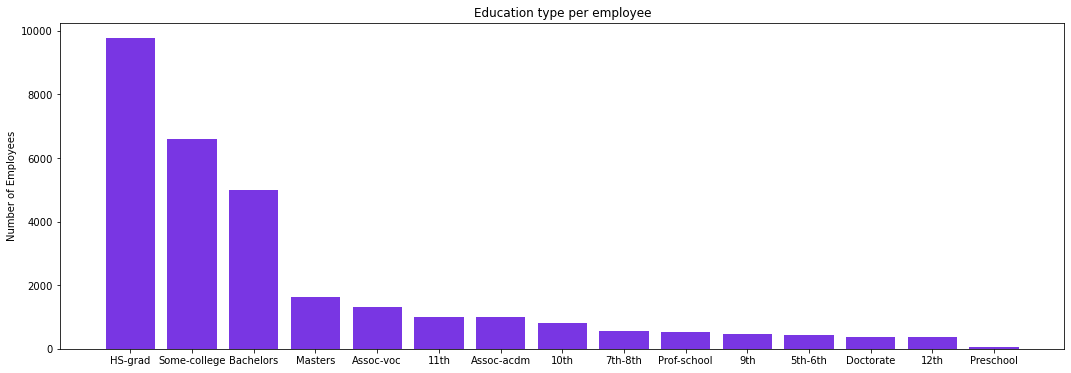

In [49]:
#creating bar chart
plt.figure(figsize=(18,6))

plt.bar(x=data_inner.education.value_counts().index,
        height=data_inner.education.value_counts(),
        color='#7936e3'
       )

plt.title('Education type per employee')
plt.ylabel('Number of Employees')

plt.show()

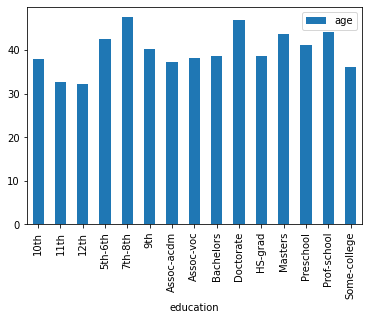

In [50]:
data_inner[['education','age']].groupby('education').mean().plot(kind='bar')
plt.show()

In [51]:
sns.set_style('whitegrid')

In [52]:
data_inner[['race','age']].groupby('race').mean().reset_index()['race']

0    Amer-Indian-Eskimo
1    Asian-Pac-Islander
2                 Black
3                 Other
4                 White
Name: race, dtype: object

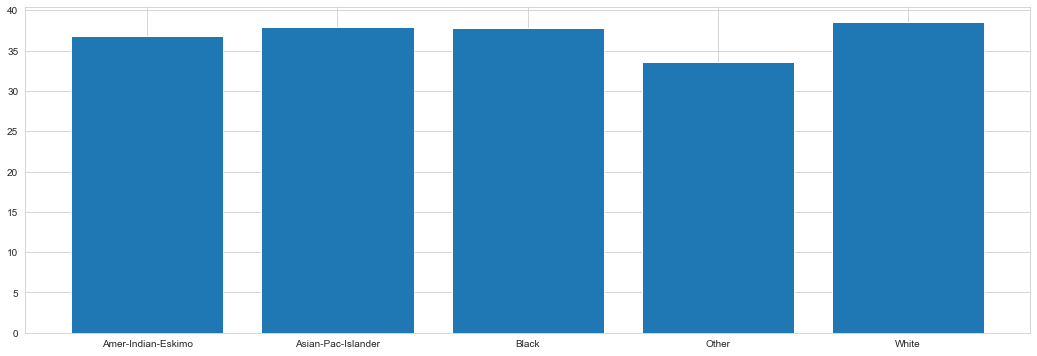

In [53]:
plt.figure(figsize=(18,6))


plt.bar(data_inner[['race','age']].groupby('race').mean().reset_index()['race'],
        data_inner[['race','age']].groupby('race').mean().reset_index()['age']
)

plt.show()

In [54]:
data_inner[['race','education','age']].groupby(['race','education']).median().reset_index().head(10)

,race,education,age
0,Amer-Indian-Eskimo,10th,28.5
1,Amer-Indian-Eskimo,11th,32.0
2,Amer-Indian-Eskimo,12th,22.0
3,Amer-Indian-Eskimo,5th-6th,46.0
4,Amer-Indian-Eskimo,7th-8th,52.0
5,Amer-Indian-Eskimo,9th,27.0
6,Amer-Indian-Eskimo,Assoc-acdm,33.0
7,Amer-Indian-Eskimo,Assoc-voc,33.5
8,Amer-Indian-Eskimo,Bachelors,38.0
9,Amer-Indian-Eskimo,Doctorate,38.5


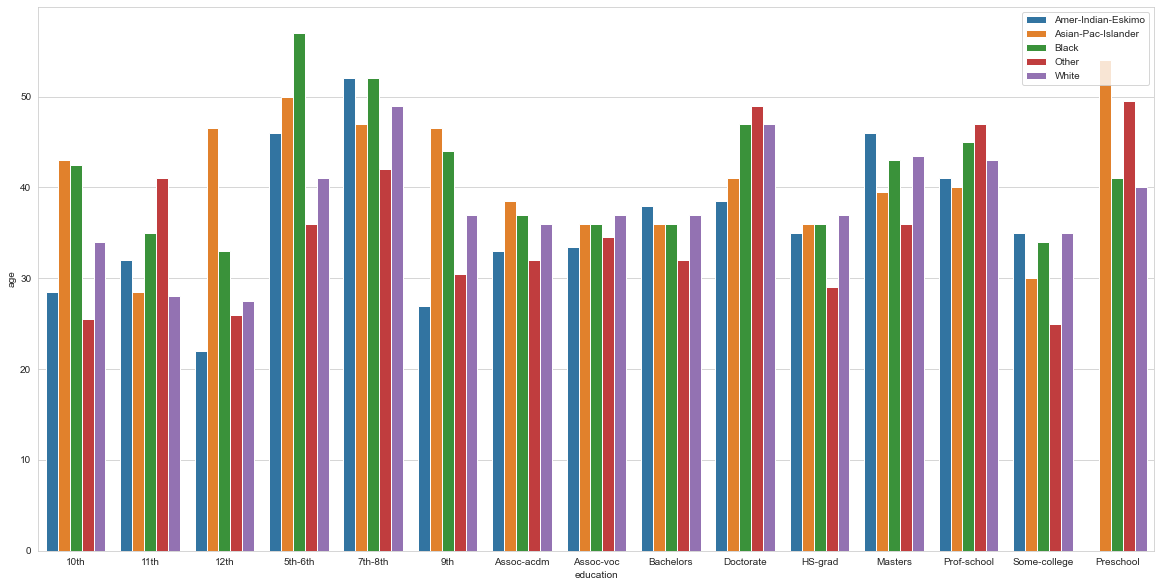

In [55]:
plt.figure(figsize=(20,10))

sns.barplot(x=data_inner[['race','education','age']].groupby(['race','education']).median().reset_index()['education'],
             y=data_inner[['race','education','age']].groupby(['race','education']).median().reset_index()['age'],
            hue=data_inner[['race','education','age']].groupby(['race','education']).median().reset_index()['race']
           
           )

plt.legend(loc='upper right')

plt.show()


In [56]:
data_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29870 entries, 1 to 32556
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              29870 non-null  int64  
 1   age             29870 non-null  int64  
 2   workclass       29870 non-null  object 
 3   fnlwgt          29870 non-null  int64  
 4   education       29870 non-null  object 
 5   marital_status  29870 non-null  object 
 6   occupation      29870 non-null  object 
 7   relationship    29870 non-null  object 
 8   race            29870 non-null  object 
 9   hours_per_week  29870 non-null  float64
 10  native_country  29870 non-null  object 
 11  income          29870 non-null  object 
 12  Geder           29870 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 4.2+ MB


# Scatter plot

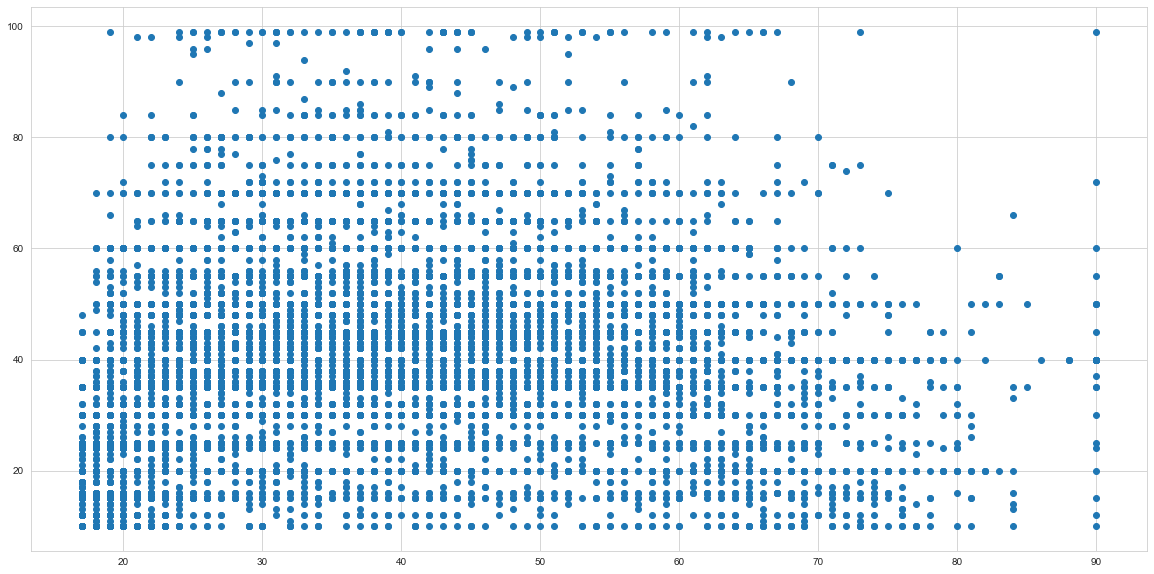

In [57]:
plt.figure(figsize=(20,10))


plt.scatter(data_inner.age, data_inner.hours_per_week)

plt.show()

# Pair plot

<Figure size 1440x720 with 0 Axes>

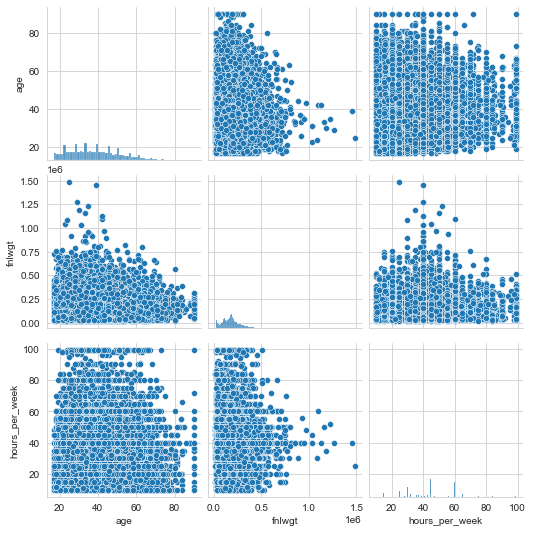

In [58]:
plt.figure(figsize=(20,10))


sns.pairplot(data_inner.iloc[:,1:])

plt.show()

# Density Plot and Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_per_week', ylabel='Density'>

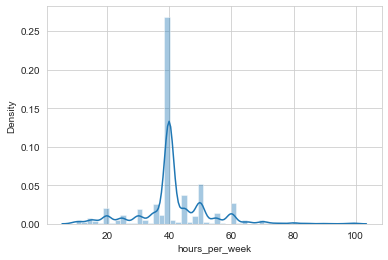

In [59]:
sns.distplot(data_inner.hours_per_week)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


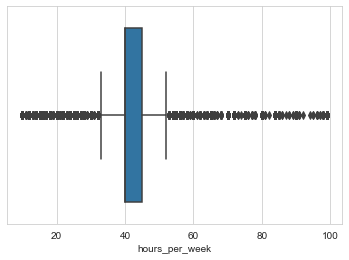

In [60]:
sns.boxplot(data_inner.hours_per_week)

plt.show()

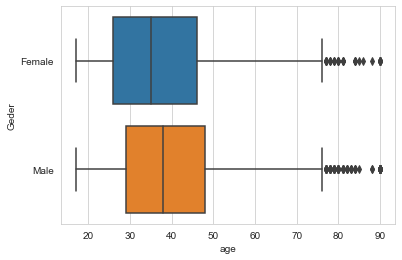

In [61]:
sns.boxplot(y=data_inner.Geder,x=data_inner.age,orient='h')

plt.show()

# Pearson Correlation Coefficient (r) 

In [62]:
data_inner.corr()

,ID,age,fnlwgt,hours_per_week
ID,1.000000,-0.080069,0.003984,-0.058064
age,-0.080069,1.000000,-0.078261,0.116839
fnlwgt,0.003984,-0.078261,1.000000,-0.024727
hours_per_week,-0.058064,0.116839,-0.024727,1.000000


In [63]:
#pearsonr
pearsonr(data_inner.age, data_inner.hours_per_week)

(0.11683936796954064, 2.7920900203445833e-91)

> **Interpretation**: Correlation Coefficient between age and hours_per_week is 0.11 and is statistically significant.

In [64]:
data_inner.Geder.unique()

array(['Female', 'Male'], dtype=object)

# Running T-test

In [66]:
data_inner['hours_per_week'][data_inner['Geder']=='Female'][:10]

1     45.0
3     20.0
4     40.0
6     35.0
8     20.0
17    42.0
18    25.0
27    50.0
31    60.0
33    50.0
Name: hours_per_week, dtype: float64

In [67]:
ttest_ind(data_inner['hours_per_week'][data_inner['Geder']=='Female'],
          data_inner['hours_per_week'][data_inner['Geder']=='Male']
)

Ttest_indResult(statistic=-40.69785322373386, pvalue=0.0)

In [68]:
data_inner[['Geder','hours_per_week']].groupby('Geder').mean()

,hours_per_week
Geder,
Female,37.435253
Male,43.091614


> **Interpretation: Female employees have statistically significantly lower working hours compared to male employees at 1% significance level (p=0.0)**